In [1]:
import astropy
import matplotlib
import numpy as np

from astropy.io import fits
from astropy.wcs import WCS

import matplotlib.pyplot as plt

In [10]:
plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['text.color'] = 'Black'
plt.rcParams['font.size'] = '14'
plt.rcParams['figure.figsize'] = (12, 9)

In [4]:
file = fits.open('/Users/FRANNYPACK/Downloads/grind!/research/Data/MG_Bridge_fg/the actual cube!.fits')
file.info()
file[0].header

Filename: /Users/FRANNYPACK/Downloads/grind!/research/Data/MG_Bridge_fg/the actual cube!.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU    8376   (2892, 2880, 56)   float32   


SIMPLE  =                    T / conforms to FITS standard                      
BITPIX  =                  -32 / array data type                                
NAXIS   =                    3 / number of array dimensions                     
NAXIS1  =                 2892                                                  
NAXIS2  =                 2880                                                  
NAXIS3  =                   56                                                  
BLANK   =                   -1  /                                               
BUNIT   = 'K       '                                                            
DATE-OBS= '2020-05-13T22:16:32.9'  /                                            
TELESCOP= 'ASKAP   '  /                                                         
CRPIX1  =    1.56200000000E+03  /                                               
CDELT1  =   -1.94444444444E-03  /                                               
CRVAL1  =    3.77962750000E+

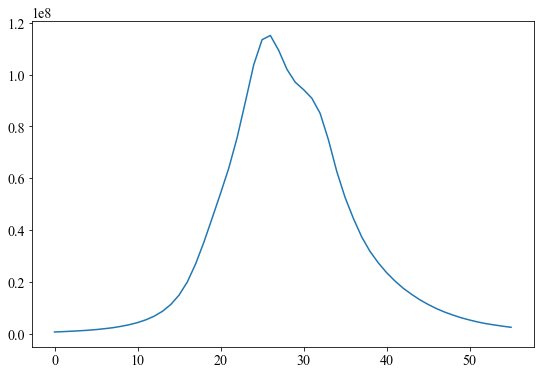

In [5]:
# plot of velocity vs brightness intensity
sum_data = np.sum(np.sum(file[0].data, axis = 1), axis = 1)
plt.plot(sum_data)

In [12]:
# gets channel maps

def chan_map(v_indx, v, vmin = 3, vmax = 30):
    wcs = WCS(file[0].header) # assigning world coordinate system (for the grid lines) 
    ax = plt.subplot(projection = wcs, slices=('x', 'y', v_indx))
    im = ax.imshow(file[0].data[v_indx,:,:], cmap = 'magma', vmin = vmin, vmax = vmax)
    plt.colorbar(im)
    plt.grid(b = True, which = 'major', axis = 'both', linewidth = 1, color = 'white')
    plt.xlabel('Right Ascension', fontsize = 20)
    plt.ylabel('Declination', fontsize = 20)
    ax.set_title('Velocity = ' + str(v) + ' km/s', fontsize = 30)

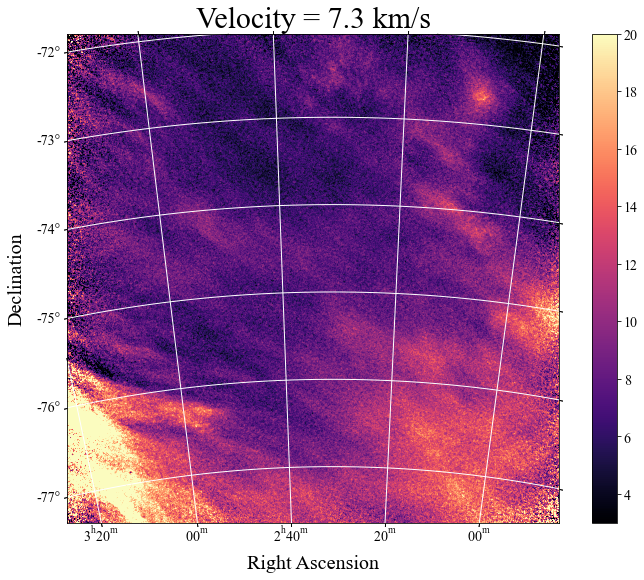

In [13]:
chan_map(22, 7.3, vmax = 20)

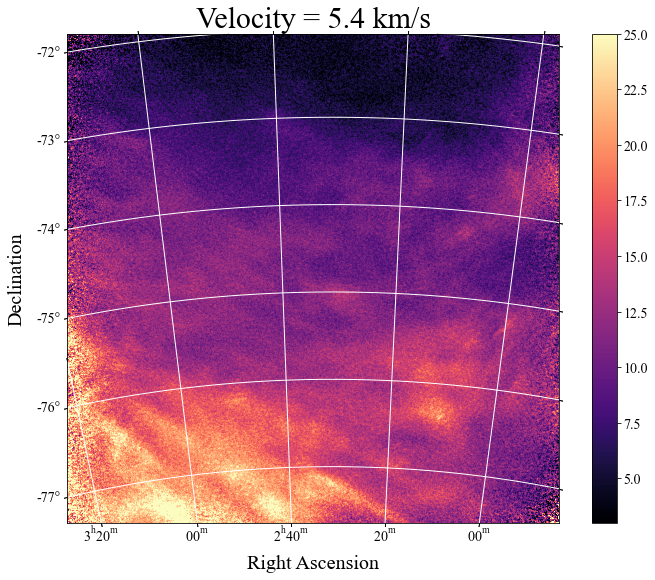

In [15]:
chan_map(29, 5.4, vmax = 25)

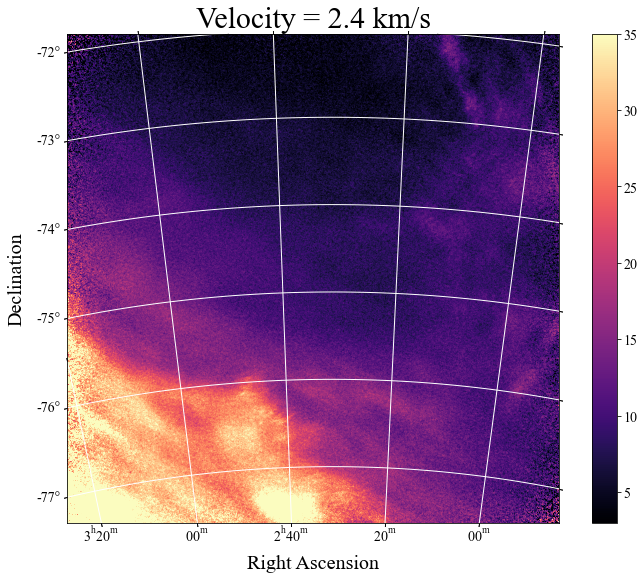

In [17]:
chan_map(27, 2.4, vmax = 35)

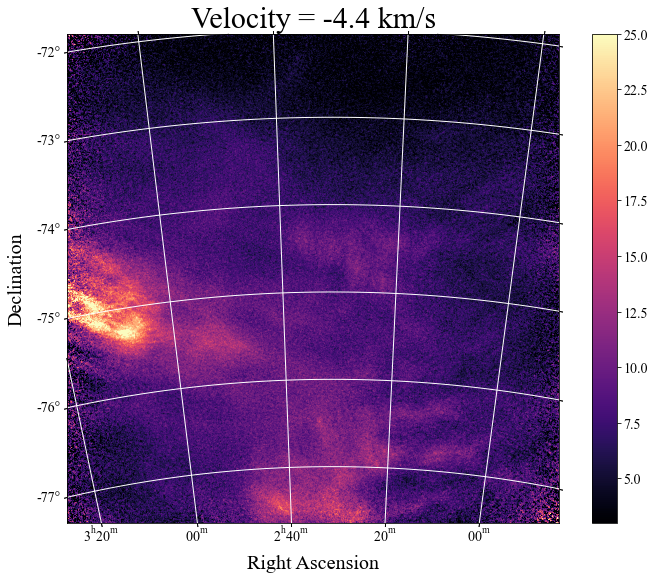

In [21]:
chan_map(34, -4.4, vmax = 25)

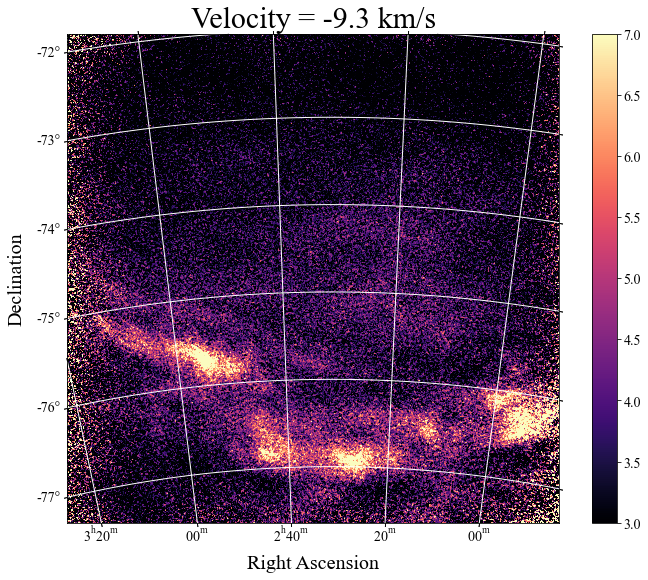

In [25]:
chan_map(39, -9.3, vmax = 7)